# 1) A) Loading Data for Zip codes in Bournemouth

In [1]:
import pandas as pd
import requests

In [2]:
!wget -O 'temp.zip' https://www.getthedata.com/downloads/open_postcode_geo.csv.zip    

--2020-08-07 13:28:50--  https://www.getthedata.com/downloads/open_postcode_geo.csv.zip
Resolving www.getthedata.com (www.getthedata.com)... 95.154.195.188
Connecting to www.getthedata.com (www.getthedata.com)|95.154.195.188|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64679638 (62M) [application/zip]
Saving to: ‘temp.zip’

100%[======================================>] 64,679,638   107MB/s   in 0.6s   

2020-08-07 13:28:51 (107 MB/s) - ‘temp.zip’ saved [64679638/64679638]



In [3]:
!unzip temp.zip
!rm temp.zip 

Archive:  temp.zip
  inflating: open_postcode_geo.csv   
  inflating: readme.txt              
  inflating: licence.txt             


In [4]:
#import os
#for subdir, dirs, files in os.walk('./'):
#    for file in files:
#      print(file)

In [5]:
df1_zip = pd.read_csv('open_postcode_geo.csv', names=["postcode","status","usertype","easting","northing","positional_quality_indicator","country","latitude","longitude","postcode_no_space","postcode_fixed_width_seven","postcode_fixed_width_eight","postcode_area","postcode_district","postcode_sector","outcode","incode"])
#df1_zip.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (3,4,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df_bournemouth_active = df1_zip.loc[(df1_zip['status'] == 'live') & (df1_zip['country'] == 'England') & (df1_zip['postcode_area']=='BH')]
#[[df1_zip['status'] == 'live'] && [df1_zip['country'] == 'England']

In [7]:
df_bournemouth_active.head()

,postcode,status,usertype,easting,northing,positional_quality_indicator,country,latitude,longitude,postcode_no_space,postcode_fixed_width_seven,postcode_fixed_width_eight,postcode_area,postcode_district,postcode_sector,outcode,incode
173456,BH1 1AA,live,large,409722,92041,1,England,50.727909,-1.863623,BH11AA,BH1 1AA,BH1 1AA,BH,BH1,BH1 1,BH1,1AA
173458,BH1 1AF,live,small,409181,91523,1,England,50.723260,-1.871300,BH11AF,BH1 1AF,BH1 1AF,BH,BH1,BH1 1,BH1,1AF
173460,BH1 1AH,live,small,409265,91464,1,England,50.722728,-1.870112,BH11AH,BH1 1AH,BH1 1AH,BH,BH1,BH1 1,BH1,1AH
173461,BH1 1AJ,live,small,409162,92265,1,England,50.729932,-1.871551,BH11AJ,BH1 1AJ,BH1 1AJ,BH,BH1,BH1 1,BH1,1AJ
173462,BH1 1AL,live,small,409284,91366,1,England,50.721846,-1.869845,BH11AL,BH1 1AL,BH1 1AL,BH,BH1,BH1 1,BH1,1AL


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


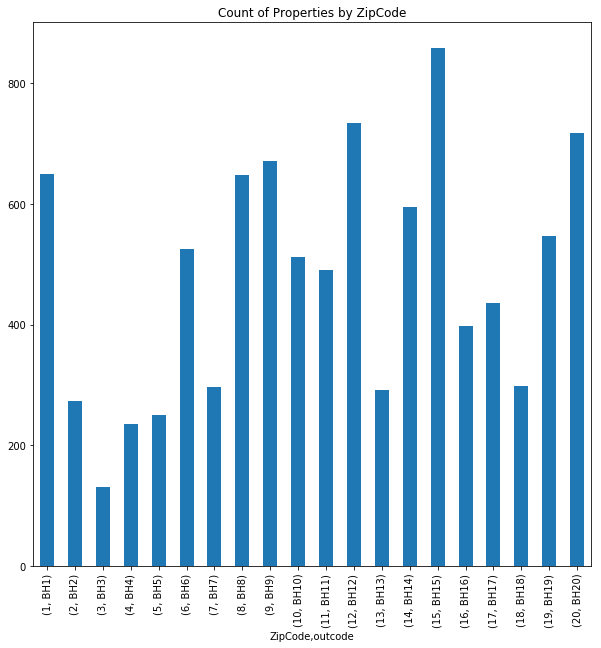

In [71]:

Search_for_These_values = ['BH21','BH22','BH23','BH24','BH25','BH26','BH25','BH26','BH27','BH28','BH29','BH30','BH31'] 

pattern = '|'.join(Search_for_These_values)

hist_df = df_bournemouth_active 

hist_df['ZipCode'] = hist_df.outcode.str[2:].astype(int)

hist_df=hist_df.sort_values(by='ZipCode')


hist_df.reindex()


hist_df[~hist_df.outcode.str.contains(pattern)].groupby(['ZipCode','outcode'])['postcode'].count().plot(kind='bar',title="Count of Properties by ZipCode",figsize =(10,10))


In [9]:

df_bournemouth_active[["latitude", "longitude"]] = df_bournemouth_active[["latitude", "longitude"]].apply(pd.to_numeric)

df_bournemouth_active.dtypes

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


postcode                         object
status                           object
usertype                         object
easting                          object
northing                         object
positional_quality_indicator      int64
country                          object
latitude                        float64
longitude                       float64
postcode_no_space                object
postcode_fixed_width_seven       object
postcode_fixed_width_eight       object
postcode_area                    object
postcode_district                object
postcode_sector                  object
outcode                          object
incode                           object
dtype: object

In [10]:
df_zip_group = df_bournemouth_active.groupby('outcode')['latitude','longitude'].mean()
df_zip_group = df_zip_group.drop(['BH20','BH21','BH22','BH23','BH24','BH25','BH31'])

df_zip_group

,latitude,longitude
outcode,,
BH1,50.724880,-1.860945
BH10,50.759580,-1.892942
BH11,50.762156,-1.919619
BH12,50.737346,-1.927792
BH13,50.708816,-1.920506
BH14,50.721365,-1.944496
BH15,50.722373,-1.984971
BH16,50.740172,-2.047393
BH17,50.746884,-1.980080


In [11]:
df_zip_group.reset_index(inplace=True)

#df_zip_group

In [12]:
df_zip_group.columns = ['Postal Code','Latitude', 'Longitude']

In [13]:
df_zip_group['House Price Detached'] = 0.0
df_zip_group['House Price Flats'] = 0.0

df_zip_group[["House Price Detached", "House Price Flats"]] = df_zip_group[["House Price Detached", "House Price Flats"]].apply(pd.to_numeric)

df_zip_group

,Postal Code,Latitude,Longitude,House Price Detached,House Price Flats
0,BH1,50.724880,-1.860945,0.0,0.0
1,BH10,50.759580,-1.892942,0.0,0.0
2,BH11,50.762156,-1.919619,0.0,0.0
3,BH12,50.737346,-1.927792,0.0,0.0
4,BH13,50.708816,-1.920506,0.0,0.0
5,BH14,50.721365,-1.944496,0.0,0.0
6,BH15,50.722373,-1.984971,0.0,0.0
7,BH16,50.740172,-2.047393,0.0,0.0
8,BH17,50.746884,-1.980080,0.0,0.0
9,BH18,50.759541,-1.998476,0.0,0.0


In [14]:
for ind in df_zip_group.index:
    #print(df_zip_group['latitude'][outcode])
    df_prices = pd.read_html('https://www.streetlist.co.uk/bh/'+df_zip_group['Postal Code'][ind])
    df_prices = df_prices[0]
    #print(df_prices['Type of Property'])
   # print(' '+str(df_prices['Type of Property'][3]) +' '+ str(df_prices['2018 Average'][0]))

    df_zip_group['House Price Detached'][ind] = float(df_prices['2018 Average'][0].replace('£','').replace(',',''))
    df_zip_group['House Price Flats'][ind] = float(df_prices['2018 Average'][3].replace('£','').replace(',',''))
    print(type(df_zip_group['House Price Flats'][ind]))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [15]:
df_post_names = pd.read_html('https://en.wikipedia.org/wiki/BH_postcode_area')
df_post_names = df_post_names[1]
df_post_names.columns = ['Postal Code','Post Town','Coverage','Authority']
df_post_names = df_post_names.drop(['Authority'],axis=1)

In [16]:
#df_zip_group.head()



df_final = df_zip_group


#print('Before dropping Boroughs ='.join(df.shape))
#df_wikipedia= df[df['Borough'] != 'Not assigned'].reset_index(drop= True)

#there are no Postal codes repeated so we dont need to concatinate the Neighbourhoods.

#df_wikipedia.shape

#df_zip_group.dtypes
#df_final[["House Price Detached", "House Price Flats"]]
df_zip_group


,Postal Code,Latitude,Longitude,House Price Detached,House Price Flats
0,BH1,50.724880,-1.860945,473737.0,181940.0
1,BH10,50.759580,-1.892942,319981.0,161868.0
2,BH11,50.762156,-1.919619,314385.0,156196.0
3,BH12,50.737346,-1.927792,312703.0,165664.0
4,BH13,50.708816,-1.920506,1612349.0,456231.0
5,BH14,50.721365,-1.944496,712123.0,290629.0
6,BH15,50.722373,-1.984971,363262.0,222399.0
7,BH16,50.740172,-2.047393,388158.0,164114.0
8,BH17,50.746884,-1.980080,332855.0,145224.0
9,BH18,50.759541,-1.998476,485518.0,293388.0


In [17]:
import requests
from pandas.io.json import json_normalize


fourSqAPIURL = "https://api.foursquare.com/v2/venues/explore"
CLIENT_ID ="NINRXL4F12KA0T5Y40SQD1CGLLM2FK1XGE1YZBYMVQINX45V"
CLIENT_SECRET= "4NSTMXF2D5VWNSAMNRUMP3RC1W4NHOLDSVOLK3UX1BXBAZD5"


In [18]:
def fetch_venue_Details(postalcode,latitude,longitude,v_list):
    new_venue = {'Postal Code':postalcode,'Latitude':latitude, 'Longitude':longitude,'Type':[],'Name':[]}

    new_venue["Name"] = v_list["venue"]["name"]
    new_venue["Type"] = v_list["venue"]["categories"][0]['pluralName']
    

    new_venues = pd.DataFrame(new_venue, index =[0])
    
  
   # new_venues = new_venues.append(new_venue,ignore_index=True)
    #print('after--- '+ str(new_venues))
    return new_venues

In [19]:
all_venues= pd.DataFrame()


for ind in df_final.index:

   
    lat = str(df_final['Latitude'][ind])
    lng = str(df_final['Longitude'][ind])

    #print(str("\n"+ df_final['outcode'][ind])+ "+++++++++++"+ str(ind)+"\n")
 
    payload = {'client_id': CLIENT_ID, 'client_secret': CLIENT_SECRET, 'll': lat+','+lng , 'radius':1500, 'v':'20180323'}

    resp = requests.get(fourSqAPIURL,params=payload)

    data = resp.json()
    
  #  print(data)
    try:
        for items in data["response"]["groups"][0]["items"]:
           
            all_venues = all_venues.append(fetch_venue_Details(df_final['Postal Code'][ind],lat,lng,items))
            #print('reached')
            all_venues.head()
    except:
        print(str(df_final['outcode'][ind])+ "-----EMPTY------------")
        empty_venue = {'Postal Code':df_final['Postal Code'][ind],'Latitude':lat, 'Longitude':lng,'Type':[],'Name':[]}
        all_venues.append(pd.DataFrame(empty_venue))

In [20]:
all_venues = all_venues.reset_index(drop=True)


all_venues.head()

,Postal Code,Latitude,Longitude,Type,Name
0,BH1,50.72488014769239,-1.8609451969230835,Pizza Places,Bournemouth Pizza Co.
1,BH1,50.72488014769239,-1.8609451969230835,Italian Restaurants,La Piccola Italia
2,BH1,50.72488014769239,-1.8609451969230835,Beaches,Bournemouth Beach (Toft Zig Zag)
3,BH1,50.72488014769239,-1.8609451969230835,Gelato Shops,Sprinkles Gelato
4,BH1,50.72488014769239,-1.8609451969230835,Indian Restaurants,Spice of Lahore


In [21]:
neighbourhood_analysis = pd.get_dummies(all_venues,prefix='',prefix_sep='',columns=['Type'])

In [22]:
mean_data = neighbourhood_analysis.set_index(['Postal Code'])
mean_data = mean_data.groupby(level='Postal Code').mean()

In [23]:
mean_data

,American Restaurants,Art Museums,Athletics & Sports,Bakeries,Bars,Beaches,Bed & Breakfasts,Beer Bars,Bistros,Bookstores,...,Tennis Stadiums,Thai Restaurants,Theaters,Trails,Train Stations,Turkish Restaurants,Vegetarian / Vegan Restaurants,Video Game Stores,Warehouse Stores,Women's Stores
Postal Code,,,,,,,,,,,,,,,,,,,,,
BH1,0.000000,0.033333,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000
BH10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BH11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000
BH12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000
BH13,0.000000,0.000000,0.000000,0.000000,0.000000,0.214286,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BH14,0.000000,0.000000,0.000000,0.066667,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BH15,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333
BH16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BH17,0.000000,0.000000,0.000000,0.050000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000


# For Segmenting we will segment into 4 distinct clusters

In [24]:
from sklearn.cluster import KMeans

#clusters
k=3

kmean_attractions = KMeans(n_clusters = k, random_state = 0, max_iter =500).fit(mean_data.to_numpy())
kmean_attractions.labels_

kmean_housing_prices = KMeans(n_clusters = k, random_state = 0, max_iter =500).fit(df_final[['House Price Detached','House Price Flats']].to_numpy())
kmean_housing_prices.labels_



array([2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2],
      dtype=int32)

In [25]:
mean_data['Attractions_Segment'] = kmean_attractions.labels_

data_analysis = mean_data.groupby('Attractions_Segment').mean()

data_analysis

,American Restaurants,Art Museums,Athletics & Sports,Bakeries,Bars,Beaches,Bed & Breakfasts,Beer Bars,Bistros,Bookstores,...,Tennis Stadiums,Thai Restaurants,Theaters,Trails,Train Stations,Turkish Restaurants,Vegetarian / Vegan Restaurants,Video Game Stores,Warehouse Stores,Women's Stores
Attractions_Segment,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.010000,0.016667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.009524,0.000000,0.000000,0.000000,0.024286,0.000000
1,0.005556,0.002778,0.002778,0.008333,0.036111,0.040507,0.003205,0.008333,0.003205,0.005556,...,0.002778,0.016667,0.002778,0.002778,0.003205,0.016667,0.005556,0.011111,0.000000,0.002778
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [26]:
cols = list(data_analysis.columns)
indices = list(data_analysis.index)


for ind in indices:
    print ('\n\n----------------------------SEGMENT =' + str(ind)+'-------------------------------------------------------------------------------------------------------')
    for col in cols:
        if(data_analysis[col][ind]>0.040):
            print(str(col)+'='+str(data_analysis[col][ind]))



----------------------------SEGMENT =0-------------------------------------------------------------------------------------------------------
Fast Food Restaurants=0.04443223443223443
Furniture / Home Stores=0.06428571428571428
Grocery Stores=0.1882051282051282
Pharmacies=0.05252747252747253
Pizza Places=0.04238095238095237
Pubs=0.04095238095238095
Supermarkets=0.09824175824175822


----------------------------SEGMENT =1-------------------------------------------------------------------------------------------------------
Beaches=0.0405067155067155
Cafés=0.06831501831501831
Coffee Shops=0.10363247863247864
Parks=0.05277777777777778
Pubs=0.06877289377289376


----------------------------SEGMENT =2-------------------------------------------------------------------------------------------------------
Coffee Shops=0.19642857142857142
Construction & Landscaping=0.07142857142857142
Convenience Stores=0.07142857142857142
Fish & Chips Shops=0.07142857142857142
Gastropubs=0.07142857142857142


In [27]:
mean_data['Housing_Segment'] = kmean_housing_prices.labels_

In [28]:
df_merged = pd.merge(df_final,mean_data[['Attractions_Segment','Housing_Segment']], how='left', on='Postal Code')

In [29]:
df_merged = pd.merge(df_merged,df_post_names,how='left',on='Postal Code')

In [30]:
df_merged

,Postal Code,Latitude,Longitude,House Price Detached,House Price Flats,Attractions_Segment,Housing_Segment,Post Town,Coverage
0,BH1,50.724880,-1.860945,473737.0,181940.0,1,2,BOURNEMOUTH,"Bournemouth town centre (East Cliff), Springbo..."
1,BH10,50.759580,-1.892942,319981.0,161868.0,0,2,BOURNEMOUTH,"Kinson, East Howe, Northbourne, Redhill, Ensbu..."
2,BH11,50.762156,-1.919619,314385.0,156196.0,0,2,BOURNEMOUTH,"Kinson, Bear Cross, West Howe, Wallisdown, Bea..."
3,BH12,50.737346,-1.927792,312703.0,165664.0,0,2,POOLE,"Branksome, Alderney, Upper Parkstone, Newtown,..."
4,BH13,50.708816,-1.920506,1612349.0,456231.0,1,1,POOLE,"Canford Cliffs, Sandbanks, Branksome Park, Bro..."
5,BH14,50.721365,-1.944496,712123.0,290629.0,1,0,POOLE,"Lower Parkstone, Lilliput, Penn Hill"
6,BH15,50.722373,-1.984971,363262.0,222399.0,1,2,POOLE,"Poole town centre, Hamworthy, Longfleet, Oakda..."
7,BH16,50.740172,-2.047393,388158.0,164114.0,2,2,POOLE,"Upton, Turlin Moor, Lytchett Minster, Lytchett..."
8,BH17,50.746884,-1.980080,332855.0,145224.0,0,2,POOLE,"Canford Heath, Creekmoor"
9,BH18,50.759541,-1.998476,485518.0,293388.0,2,0,BROADSTONE,Broadstone


In [31]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_merged.groupby('Housing_Segment').mean()[['House Price Detached','House Price Flats']]

,House Price Detached,House Price Flats
Housing_Segment,,
0,602504.625,238279.875
1,1612349.000,456231.000
2,371541.800,170475.400


In [32]:
df_merged

,Postal Code,Latitude,Longitude,House Price Detached,House Price Flats,Attractions_Segment,Housing_Segment,Post Town,Coverage
0,BH1,50.725,-1.861,473737.000,181940.000,1,2,BOURNEMOUTH,"Bournemouth town centre (East Cliff), Springbo..."
1,BH10,50.760,-1.893,319981.000,161868.000,0,2,BOURNEMOUTH,"Kinson, East Howe, Northbourne, Redhill, Ensbu..."
2,BH11,50.762,-1.920,314385.000,156196.000,0,2,BOURNEMOUTH,"Kinson, Bear Cross, West Howe, Wallisdown, Bea..."
3,BH12,50.737,-1.928,312703.000,165664.000,0,2,POOLE,"Branksome, Alderney, Upper Parkstone, Newtown,..."
4,BH13,50.709,-1.921,1612349.000,456231.000,1,1,POOLE,"Canford Cliffs, Sandbanks, Branksome Park, Bro..."
5,BH14,50.721,-1.944,712123.000,290629.000,1,0,POOLE,"Lower Parkstone, Lilliput, Penn Hill"
6,BH15,50.722,-1.985,363262.000,222399.000,1,2,POOLE,"Poole town centre, Hamworthy, Longfleet, Oakda..."
7,BH16,50.740,-2.047,388158.000,164114.000,2,2,POOLE,"Upton, Turlin Moor, Lytchett Minster, Lytchett..."
8,BH17,50.747,-1.980,332855.000,145224.000,0,2,POOLE,"Canford Heath, Creekmoor"
9,BH18,50.760,-1.998,485518.000,293388.000,2,0,BROADSTONE,Broadstone


In [41]:
!pip install folium
import folium
 
def pricing_string(indicator):
    if indicator == 0:
        return '$$'
    elif indicator == 2:
        return'$'
    elif indicator == 1:
        return '$$$'
    
def housing_string(indicator):
    if indicator == 1:
        return 'Beach Town'
    elif indicator == 0:
        return'Residential'
    elif indicator == 2:
        return 'Suburb'
    
m = folium.Map(location=[50.720806,-1.904755],zoom_start=12.5)

for ind in df_merged.index:
    
    if(df_merged['Attractions_Segment'][ind] == 0):
        div = folium.DivIcon(html=(
            '<svg>'
              '<g>'
                '<rect x="0" y="0" width="80" height="30" fill="green" stroke="green" stroke-width="3"></rect>'
                 '<text x="5" y="11" font-family="Verdana" font-size="12" fill="white">'+str(df_merged['Postal Code'][ind])+' '+pricing_string(df_merged['Housing_Segment'][ind])+'</text>'
                 '<text x="5" y="25" font-family="Verdana" font-size="12" fill="white">'+ housing_string(df_merged['Attractions_Segment'][ind])+'</text>'
              '</g>'
            '</svg>'
        ))
    elif(df_merged['Attractions_Segment'][ind] == 1):
        print(str(df_merged['Postal Code'][ind]))
        div = folium.DivIcon(html=(
            '<svg>'
              '<g>'
                '<rect x="0" y="0" width="80" height="30" fill="magenta" stroke="magenta" stroke-width="3"></rect>'
                 '<text x="5" y="11" font-family="Verdana" font-size="12" fill="white">'+str(df_merged['Postal Code'][ind])+' '+pricing_string(df_merged['Housing_Segment'][ind])+'</text>'
                 '<text x="5" y="25" font-family="Verdana" font-size="12" fill="white">'+ housing_string(df_merged['Attractions_Segment'][ind])+'</text>'
               #  '<tspan="0" y="0">Hii</tspan>'
               #  '<tspan="7" y="7">'+str(df_merged['Postal Code'][ind])+'</tspan>'             
                 
              '</g>'
            '</svg>'
            ))
    elif(df_merged['Attractions_Segment'][ind] == 2):
        div = folium.DivIcon(html=(
            '<svg>'
              '<g>'
                '<rect x="0" y="0" width="80" height="30" fill="blue" stroke="blue" stroke-width="3"></rect>'
               '<text x="5" y="11" font-family="Verdana" font-size="12" fill="white">'+str(df_merged['Postal Code'][ind])+' '+pricing_string(df_merged['Housing_Segment'][ind])+'</text>'
                 '<text x="5" y="25" font-family="Verdana" font-size="12" fill="white">'+ housing_string(df_merged['Attractions_Segment'][ind])+'</text>'
              '</g>'
            '</svg>'
            ))
    folium.Marker((df_merged['Latitude'][ind],df_merged['Longitude'][ind]), icon=div).add_to(m)

m

BH1
BH13
BH14
BH15
BH19
BH2
BH3
BH4
BH5
BH6
BH7
BH8


In [42]:
df_formatted_merged = df_merged
column_names = ["Postal Code","Post Town","Coverage","Latitude","Longitude","Attractions_Segment","House Price Detached","House Price Flats","Housing_Segment"]

df_formatted_merged = df_formatted_merged.reindex(columns=column_names)


#pd.set_option('max_colwidth', 300)

df_formatted_merged['Housing_Segment'] = df_formatted_merged.apply(lambda row : pricing_string(row['Housing_Segment']),axis = 1)
df_formatted_merged['Attractions_Segment'] = df_formatted_merged.apply(lambda row : housing_string(row['Attractions_Segment']),axis = 1)

#df_formatted_merged['Attractions_Segment'] = df_formatted_merged.apply(lambda row : if row['Attractions_Segment'] == 1,axis = 1)
#df_formatted_merged['Attractions_Segment'] = df_formatted_merged.apply(lambda row : if row['Attractions_Segment'] == 0,axis = 1)
#pd.options.display.float_format = '${:, .2f}'.format
#df_formatted_merged.sort_values(by='House Price Detached',ascending = False)

#pd.reset_option('^display.', silent=True)
df_formatted_merged = df_formatted_merged.sort_values(by='House Price Detached',ascending = False)

df_formatted_merged['House Price Detached'] = df_formatted_merged['House Price Detached'].map('{:,.2f} GBP'.format)
df_formatted_merged['House Price Flats'] = df_formatted_merged['House Price Flats'].map('{:,.2f} GBP'.format)

df_formatted_merged

,Postal Code,Post Town,Coverage,Latitude,Longitude,Attractions_Segment,House Price Detached,House Price Flats,Housing_Segment
4,BH13,POOLE,"Canford Cliffs, Sandbanks, Branksome Park, Bro...",50.709,-1.921,Beach Town,"1,612,349.00 GBP","456,231.00 GBP",$$$
12,BH3,BOURNEMOUTH,"Talbot Woods, Winton south",50.737,-1.883,Beach Town,"718,151.00 GBP","225,350.00 GBP",$$
13,BH4,BOURNEMOUTH,"Westbourne, Branksome Woods",50.721,-1.900,Beach Town,"714,105.00 GBP","244,530.00 GBP",$$
5,BH14,POOLE,"Lower Parkstone, Lilliput, Penn Hill",50.721,-1.944,Beach Town,"712,123.00 GBP","290,629.00 GBP",$$
11,BH2,BOURNEMOUTH,Bournemouth town centre (West Cliff),50.721,-1.884,Beach Town,"594,750.00 GBP","188,105.00 GBP",$$
14,BH5,BOURNEMOUTH,"Boscombe, Pokesdown",50.725,-1.832,Beach Town,"556,806.00 GBP","215,850.00 GBP",$$
10,BH19,SWANAGE,"Swanage, Studland, Langton Matravers, Worth Ma...",50.612,-1.971,Beach Town,"544,777.00 GBP","224,505.00 GBP",$$
15,BH6,BOURNEMOUTH,"Southbourne, Tuckton, Wick",50.728,-1.802,Beach Town,"493,807.00 GBP","223,882.00 GBP",$$
9,BH18,BROADSTONE,Broadstone,50.760,-1.998,Suburb,"485,518.00 GBP","293,388.00 GBP",$$
0,BH1,BOURNEMOUTH,"Bournemouth town centre (East Cliff), Springbo...",50.725,-1.861,Beach Town,"473,737.00 GBP","181,940.00 GBP",$
